In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/Colab Notebooks/Breast Cancer

/content/drive/MyDrive/Colab Notebooks/Breast Cancer


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss
from sklearn import metrics

In [ ]:
def read_data(path):
    data = pd.read_csv(path)
    data.set_index("Hybridization REF",inplace = True)
    labels = data.pop("CANCER")
    return data, labels

In [ ]:
X,y=read_data("upscale.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9753086419753086


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[160   0]
 [  8 156]]


[[160   0]
 [  8 156]]


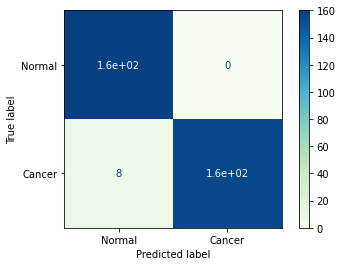

In [ ]:
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, average_precision_score, accuracy_score
label = ["Normal", "Cancer"]
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm,display_labels = label).plot(cmap = "GnBu")
path="/content/drive/My Drive/Colab Notebooks/BreastCancer/"
name="matrix"
#plt.savefig(f'{path}{name}.png')
plt.show()

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 5.6MB/s 


In [ ]:
from eli5 import show_prediction
import eli5 as eli

eli.show_prediction(clf, X_test.iloc[40],
                    feature_names=list(X.columns),
                    show_feature_values=True)

In [ ]:
from eli5 import show_prediction
import eli5 as eli

eli.show_prediction(clf, X_test.iloc[48],
                    feature_names=list(X.columns),
                    show_feature_values=True)